# Analyzing Marketing Campaigns

## 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset and taking a quick look

In [2]:
marketing = pd.read_csv('marketing_ds_1.csv', parse_dates=['date_served',
                                                      'date_subscribed', 
                                                      'date_canceled'])

In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


## 3. Preprocessing before analysis

In [4]:
# Type conversions
# a new column for retention
marketing["is_retained"] = np.where(marketing["converted"] == False, 0,
                                    marketing["is_retained"].values)

marketing['converted'] = marketing["converted"].astype("bool")
marketing['is_retained'] = marketing["is_retained"].astype("bool")

# strings to numbers for better data storage
marketing.groupby("subscribing_channel")["subscribing_channel"].count()

channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
marketing["channel_code"] = marketing["subscribing_channel"].map(channel_dict)

# New column: which day of the week?
marketing["DoW"] = marketing["date_subscribed"].dt.dayofweek

## 4. Insights about customers and marketing assets

### 4.1. How many users see marketing assets?
This is crucial to understand how effective our marketing efforts have been over the past month.

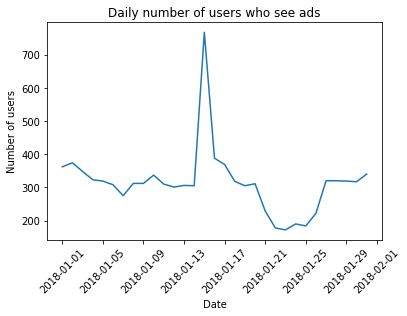

In [6]:
daily_users = marketing.groupby("date_served")["user_id"].nunique()

sns.lineplot(data = daily_users)
plt.title('Daily number of users who see ads') 
plt.xlabel('Date')
plt.ylabel('Number of users') 
plt.tick_params(axis="x", labelsize=10)
plt.xticks(rotation = 45)
plt.show()

### 4.2. Another insight 
... 

## 5. Marketing Metrics

In [8]:
# conversion rate calculation
subscribers = marketing[marketing["converted"] == 1].user_id.nunique()
total = marketing.user_id.nunique()
conv_rate = subscribers / total

# retention rate calculation

retained = marketing[marketing["is_retained"] == 1].user_id.nunique()
retention = retained / subscribers

print("Total conversion rate: ", round(conv_rate*100, 2), "%")
print("Total retention rate: ", round(retention*100, 2), "%")

Total conversion rate:  14.09 %
Total retention rate:  67.57 %


## 6.  Building functions for metrics 

In [10]:
### building a retention function

def retention_rate(dataframe, column_names):
    retained = dataframe[dataframe["is_retained"] == True].\
        groupby(column_names)["user_id"].nunique()
        
    converted = dataframe[dataframe["converted"] == True].\
        groupby(column_names)["user_id"].nunique()
        
    retention_rate = retained / converted
    return retention_rate

daily_retention = retention_rate(marketing, ["date_served", "marketing_channel"])
daily_retention = pd.DataFrame(daily_retention.unstack(level = 1))


### building a plotting function

def plot_ret_rate(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' retention rate\n', size = 16)
        plt.ylabel('Retention rate (%)', size = 14) 
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation= 45)
        plt.show()

### building conversion_rate function

def conversion_rate(dataframe, column_names):
    conversion = dataframe[dataframe["converted"] == True].groupby(column_names)\
        ["user_id"].nunique()
     
    total = dataframe.groupby(column_names)["user_id"].nunique()
    
    conversion_rate = conversion / total
    return conversion_rate


### building plot_conv_rate function   

def plot_conv_rate(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate (%)', size = 14) 
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation= 45)
        plt.show()